In [1]:
import sys
import os
sys.path.append('/home/clarkmaio/workspace/pimpmyplot/')

import numpy as np
import matplotlib.pyplot as plt

import pimpmyplot as pmp



## Standard plot

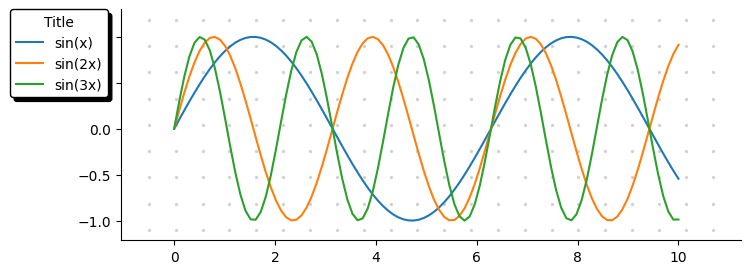

In [2]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(8, 3))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.sin(2*x), label='sin(2x)')
plt.plot(x, np.sin(3*x), label='sin(3x)')

pmp.bullet_grid(stepinch=.3)        # dotted grid similar to a bllet journal
pmp.remove_axis('top', 'right')     # remove axis in a simpler way
#pmp.remove_ticks()                  # remove ticks in a simpler way
pmp.legend(loc='ext upper left', ncol=1, title='Title')                        # same as plt legend but better looking and horizontal labels as default


Bbox(x0=38.40277777777777, y0=43.547079910187136, x1=65.27777777777777, y1=57.547079910187136)
Bbox(x0=38.52777777777777, y0=143.53138660679144, x1=65.27777777777777, y1=157.53138660679144)
Bbox(x0=43.40277777777777, y0=243.51569330339575, x1=65.27777777777777, y1=257.5156933033958)
Bbox(x0=43.15277777777777, y0=343.50000000000006, x1=65.27777777777777, y1=357.50000000000006)
26.875
0.04479166666666667


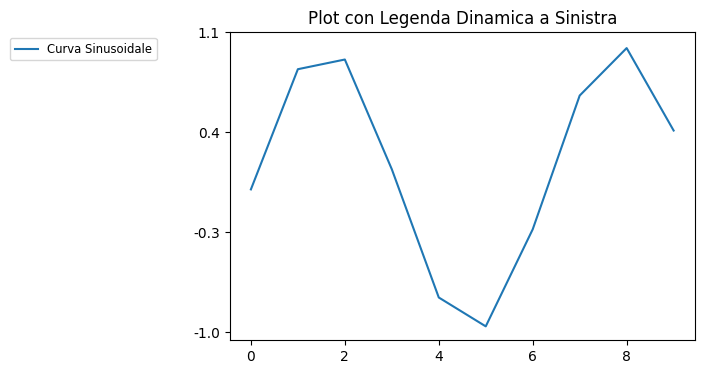

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# 1. Preparazione della Figura e dei Dati
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(10), np.sin(np.arange(10)), label='Curva Sinusoidale')

# Imposta etichette lunghe per l'asse Y per dimostrare il problema
ax.set_yticks(np.linspace(-1, 1.1, 4))
ax.set_yticklabels([f'{i:.1f} - Etichetta Molto Lunga' for i in np.linspace(-1, 1.1, 4)])
ax.set_yticklabels([f'{i:.1f}' for i in np.linspace(-1, 1.1, 4)])

ax.set_title("Plot con Legenda Dinamica a Sinistra")

# 2. Ottenere il Renderer e Disegnare la Figura
# Dobbiamo disegnare la figura (nel back-end) affinché le posizioni in pixel siano calcolate.
fig.canvas.draw()
renderer = fig.canvas.get_renderer()

# 3. Calcolare la larghezza massima occupata dai Tick Label
# Troviamo la larghezza (in pixel) del tick label più lungo sull'asse Y.
y_labels = ax.get_yticklabels()
max_width_px = 0

for label in y_labels:
    # get_window_extent() restituisce le coordinate in pixel sullo schermo
    bbox = label.get_window_extent(renderer=renderer)
    print(bbox)
    max_width_px = max(max_width_px, bbox.width)


figwidth = fig.get_window_extent().width
print(max_width_px)
print(max_width_px / (figwidth))
L = (max_width_px) / (figwidth) + 0.1

ax.legend(
    loc='upper right',                # Ancoriamo l'angolo superiore destro della legenda
    bbox_to_anchor=(-L, 1.), # X è la posizione calcolata, Y è il top della figura
    frameon=True,
    fontsize='small',
    #transform=fig.transFigure         # Usiamo le coordinate della Figura intera
)

plt.show()

## Subplots

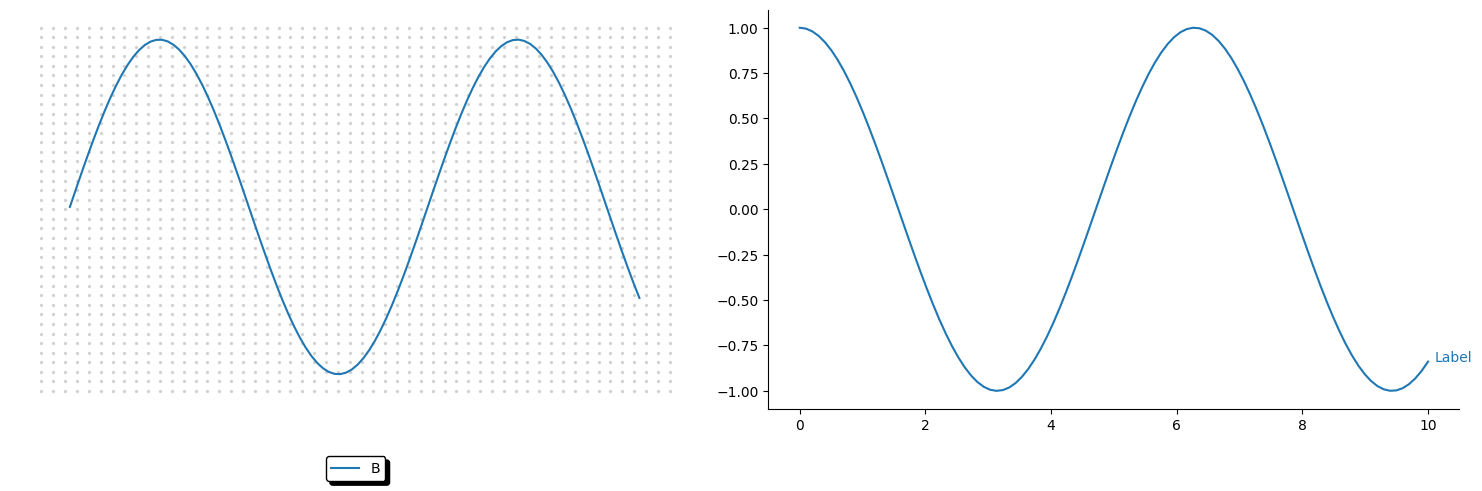

In [10]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.exp(x)/10000, np.sin(x), np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(x, y2, label='B')
ax[1].plot(x, y3, label='Label')

pmp.bullet_grid(ax=ax[0], stepinch=.1)
pmp.legend(ax=ax[0])
pmp.remove_axis(ax=ax[0])
pmp.remove_ticks(ax=ax[0])

pmp.annotation_legend(ax=ax[1], ha='left')
pmp.remove_axis('right', 'top', ax=ax[1])
plt.tight_layout()

# Legend

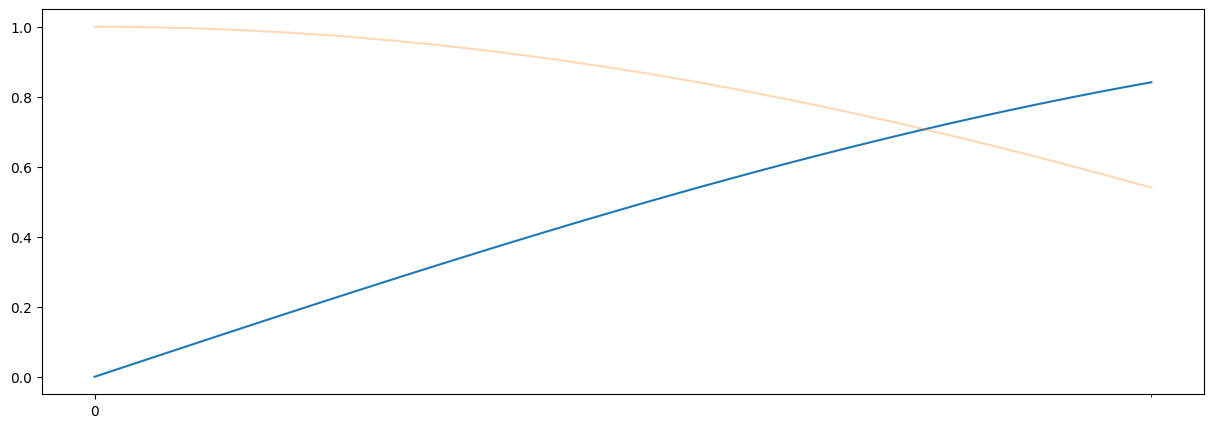

In [5]:

from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(15, 5))
x = np.linspace(0, 1, 100)
plt.plot(x, np.sin(x), label='A')
plt.plot(x, np.cos(x), label='B', alpha=.3)
ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))

#pmp.bullet_grid()
#pmp.annotation_legend(line_color=True, fontweight='bold', size=None, color='black')
#pmp.remove_axis(); pmp.remove_ticks()


#ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))